In [20]:
import torch
import torch.nn as nn
import torch_helpers as h

from graph_visualization import make_dot


def graph(var, path='figures/debug_graph', name="", block=False, **kwargs):
    dot = make_dot(var, name=name)
    dot.format = 'png'
    dot.render(path.format(name=name, **kwargs))
    if block:
        raise Exception('Stop Here')
    return dot

In [36]:
x = h.const(torch.ones(2, 2) * 1.5)
graph(x)

In [37]:
x = h.volatile(torch.ones(2, 2) * 1.5)
graph(x)

In [38]:
x = h.varify(torch.ones(2, 2) * 1.5)
graph(x)

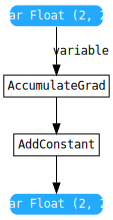

In [39]:
graph(x + 1)

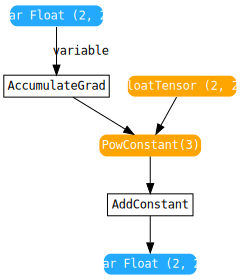

In [40]:
graph(x ** 3 + 1)

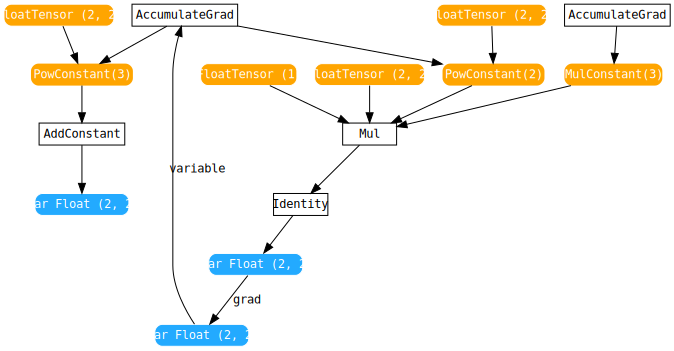

In [41]:
z = x ** 3 + 1
z.backward(h.varify(torch.ones(1)), retain_graph=True)
graph(z)

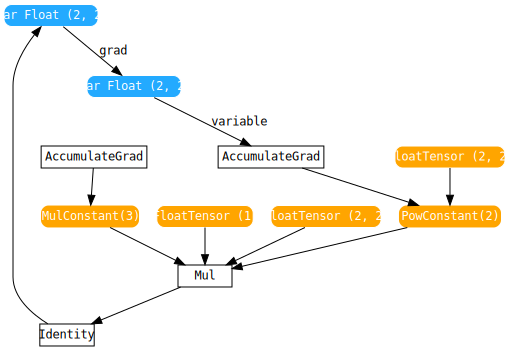

In [42]:
graph(x.grad)

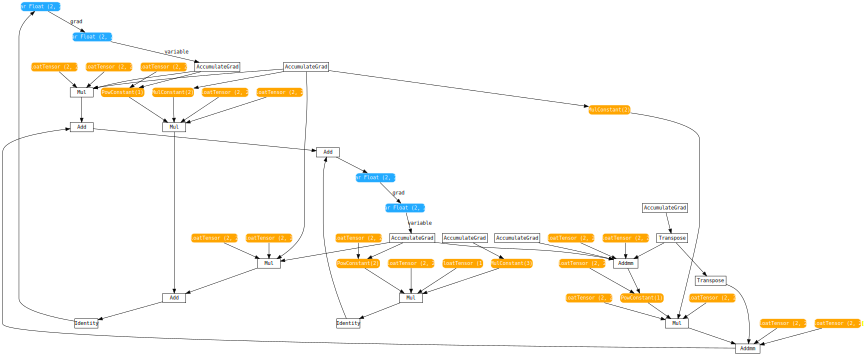

In [43]:
b = nn.Linear(2, 2)(x)
y = h.varify(torch.ones(2, 2) * 3)
z = b ** 2 + y * x + y ** 2
z.backward(h.varify(torch.ones(2, 2)), retain_graph=True)
# z.backward(h.varify(torch.ones(2, 2)), retain_graph=True)
graph(y.grad, block=False)

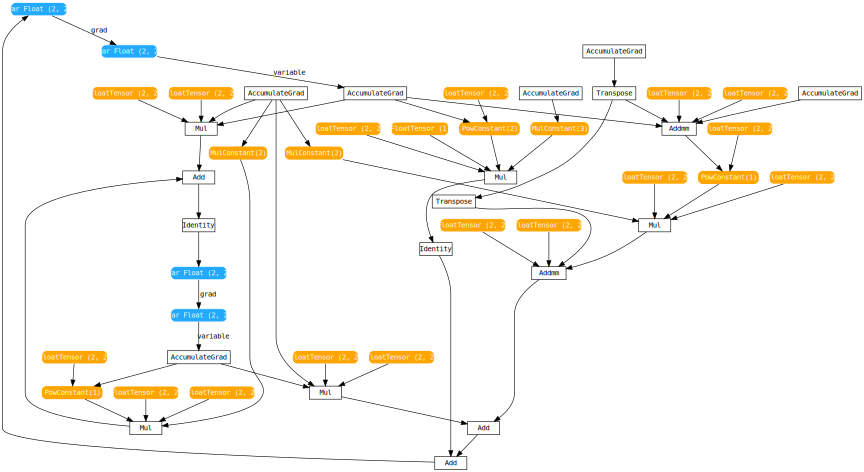

In [44]:
grad_sum = 2 * x.grad + y.grad
x_hv, = torch.autograd.grad(
    outputs=[grad_sum], grad_outputs=[torch.ones(2, 2)],
    inputs=[x], create_graph=True, only_inputs=True)
graph(x.grad, block=False)

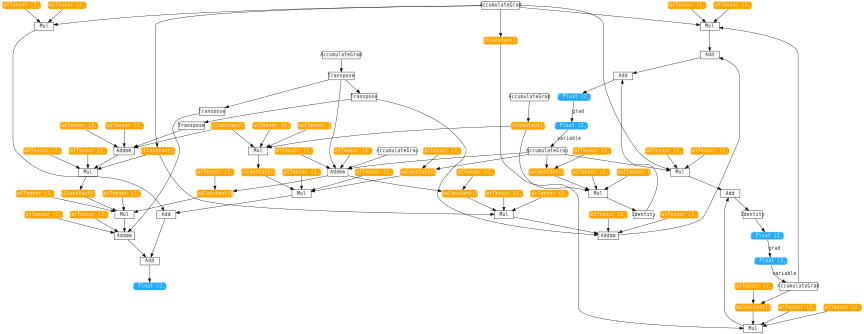

In [45]:
graph(x_hv, block=False)